<a href="https://colab.research.google.com/github/an1mebit/Navigation_system/blob/main/Second_analytic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
t = np.arange(101)
V_y = 30 * np.sin((2 * np.pi * t)/30)

In [ ]:
H0 = 11000
H = H0 + np.cumsum(V_y)

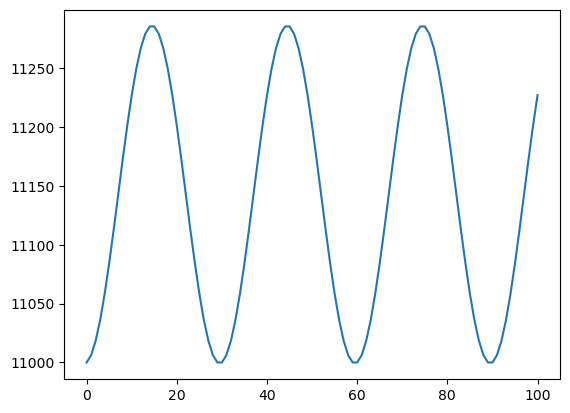

In [ ]:
plt.plot(t, H, "")

In [ ]:
p_0 = 101325.0
R = 29.27
tao = 0.0065
T_0 = 288.0
p_c = []
for H_str in H:
  if H_str < 11000:
    T = T_0 - tao * H_str
    p_c.append(
        p_0 * (1 - tao * H_str / T_0)**(1 / tao / R)
    )
  else:
    T = 216.65
    p_c.append(
        p_0 * (1 - tao * 11000 / T_0)**(1 / tao / R) * np.exp(-(H_str - 11000) / (R * T))
    )

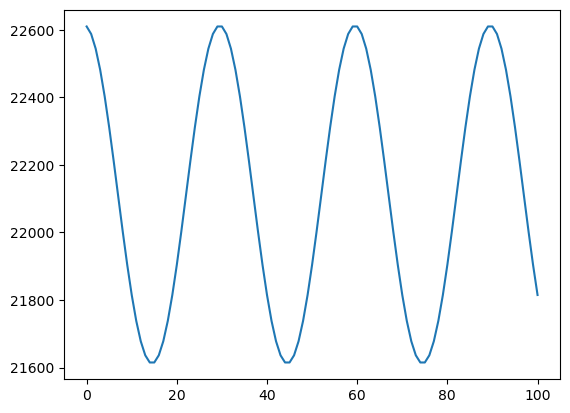

In [ ]:
plt.plot(t, p_c, "-")

In [ ]:
H_restored = []
for p_c_str, H_str in zip(p_c, H):
  if p_c_str > max(p_c):
    T = T_0 - tao * H_str
    H_restored.append(
        11000 + R * T * np.log(p_c_str / p_0)
    )
  else:
    T = 216.65
    H_restored.append(
        (1 - (p_c_str / p_0)**(tao * R)) * (T_0 / tao)
    )

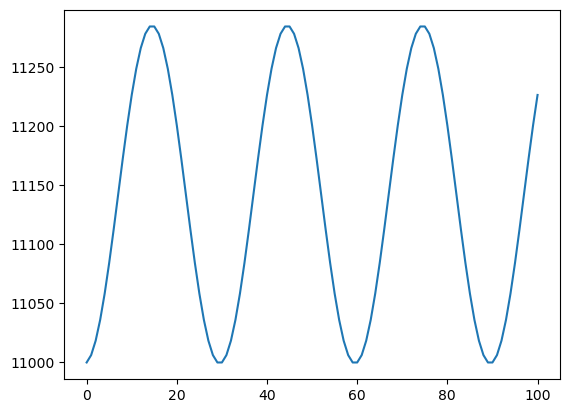

In [ ]:
plt.plot(t, H_restored, "-")